## 4.2 Mallow' cp

### 4.21 Read data into R

In [25]:
cleanbodyfat=read.csv("clean dataset.csv")
library(leaps)
library(faraway)
source("Crossvalidation.R")
n=ncol(cleanbodyfat)
X = cleanbodyfat[, 4:n]
Y = cleanbodyfat$BODYFAT

### 4.22 Check the variables chosen in each size 

Subset selection object
14 Variables  (and intercept)
          Forced in Forced out
AGE           FALSE      FALSE
WEIGHT        FALSE      FALSE
HEIGHT        FALSE      FALSE
ADIPOSITY     FALSE      FALSE
NECK          FALSE      FALSE
CHEST         FALSE      FALSE
ABDOMEN       FALSE      FALSE
HIP           FALSE      FALSE
THIGH         FALSE      FALSE
KNEE          FALSE      FALSE
ANKLE         FALSE      FALSE
BICEPS        FALSE      FALSE
FOREARM       FALSE      FALSE
WRIST         FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         AGE WEIGHT HEIGHT ADIPOSITY NECK CHEST ABDOMEN HIP THIGH KNEE ANKLE
1  ( 1 ) " " " "    " "    " "       " "  " "   "*"     " " " "   " "  " "  
2  ( 1 ) " " "*"    " "    " "       " "  " "   "*"     " " " "   " "  " "  
3  ( 1 ) " " "*"    " "    " "       " "  " "   "*"     " " " "   " "  " "  
4  ( 1 ) " " "*"    " "    " "       " "  " "   "*"     " " " "   " "  " "  
5  ( 1 ) "*" "*"    " "    " "   

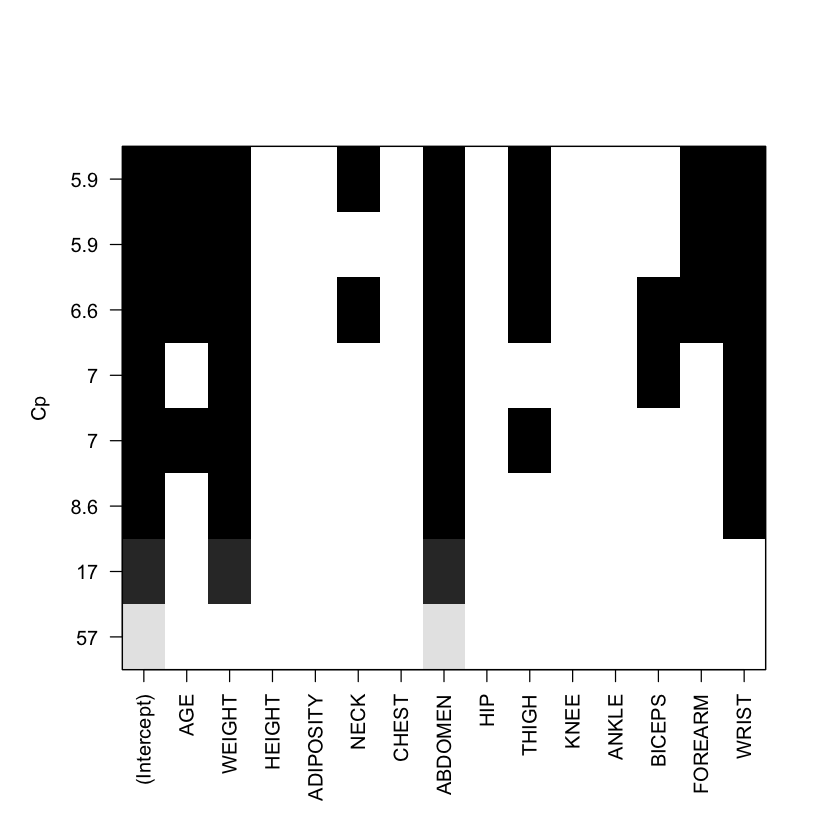

In [26]:
a=regsubsets(X,Y)
summary(a)
plot(a,scale="Cp")

  It's easy to find that ABDOMEN is significantly important in calculating bodyfat, followed by WEIGHT, and WRIST is the third factor. The other factors seems not that consistant in deciding bodyfat. We find that there is a limited decrease in mallow'cp when we increase the number of variables after the model BODYFAT ~ WEIGHT + ABDOMEN + WRIST. 

### 4.23 Get the best number of variables under the criterion of Mallow's cp

In [1]:
g1=leaps(X, Y, nbest = 1,method = "Cp")
Cpplot(g1)
order(g1$Cp)[1] 

ERROR: Error in leaps(X, Y, nbest = 1, method = "Cp"): could not find function "leaps"


### 4.24 Calculate the MSE of each models under Cross Validation

In [28]:
print(colnames(cleanbodyfat)[as.numeric(which(g1$which[8,]==TRUE)) + 3])
model_cp0 = BODYFAT ~ AGE + WEIGHT + NECK + ABDOMEN  + THIGH + BICEPS + FOREARM + WRIST
cp0_cv = CVMSE(cleanbodyfat, model_cp0, 5,100)   # number of variables is 8
print(colnames(cleanbodyfat)[as.numeric(which(g1$which[7,]==TRUE)) + 3])
model_cp1 = BODYFAT  ~ AGE + WEIGHT + NECK + ABDOMEN  + THIGH + FOREARM + WRIST
cp1_cv = CVMSE(cleanbodyfat, model_cp1, 5,100)   # number of variables is 7
print(colnames(cleanbodyfat)[as.numeric(which(g1$which[6,]==TRUE)) + 3])  
model_cp2 = BODYFAT  ~ AGE + WEIGHT + ABDOMEN + THIGH + FOREARM + WRIST
cp2_cv = CVMSE(cleanbodyfat, model_cp2, 5,100)   # number of variables is 6
print(colnames(cleanbodyfat)[as.numeric(which(g1$which[5,]==TRUE)) + 3])  
model_cp3 = BODYFAT  ~  WEIGHT + NECK + ABDOMEN + THIGH + WRIST
cp3_cv = CVMSE(cleanbodyfat, model_cp3, 5,100)   # number of variables is 5
print(colnames(cleanbodyfat)[as.numeric(which(g1$which[4,]==TRUE)) + 3])  
model_cp4 = BODYFAT  ~  WEIGHT + ABDOMEN + BICEPS + WRIST
cp4_cv = CVMSE(cleanbodyfat, model_cp4, 5,100)   # number of variables is 4
print(colnames(cleanbodyfat)[as.numeric(which(g1$which[3,]==TRUE)) + 3])  
model_cp5 = BODYFAT  ~  WEIGHT + ABDOMEN + WRIST
cp5_cv = CVMSE(cleanbodyfat, model_cp5, 5,100)   # number of variables is 3
print(colnames(cleanbodyfat)[as.numeric(which(g1$which[2,]==TRUE)) + 3])  
model_cp6 = BODYFAT  ~  WEIGHT + ABDOMEN 
cp6_cv = CVMSE(cleanbodyfat, model_cp6, 5,100)   # number of variables is 2
print(colnames(cleanbodyfat)[as.numeric(which(g1$which[1,]==TRUE)) + 3])  
model_cp7 = BODYFAT  ~ ABDOMEN 
cp7_cv = CVMSE(cleanbodyfat, model_cp7, 5,100)   # number of variables is 1
cp_cv=c(cp0_cv,cp1_cv,cp2_cv,cp3_cv,cp4_cv,cp5_cv,cp6_cv,cp7_cv)

[1] "AGE"     "WEIGHT"  "NECK"    "ABDOMEN" "THIGH"   "BICEPS"  "FOREARM"
[8] "WRIST"  
[1] "AGE"     "WEIGHT"  "NECK"    "ABDOMEN" "THIGH"   "FOREARM" "WRIST"  
[1] "AGE"     "WEIGHT"  "ABDOMEN" "THIGH"   "FOREARM" "WRIST"  
[1] "AGE"     "WEIGHT"  "ABDOMEN" "THIGH"   "WRIST"  
[1] "WEIGHT"  "ABDOMEN" "BICEPS"  "WRIST"  
[1] "WEIGHT"  "ABDOMEN" "WRIST"  
[1] "WEIGHT"  "ABDOMEN"
[1] "ABDOMEN"


### 4.25 Plot the MSE and Mallow's cp under differernt number of variables

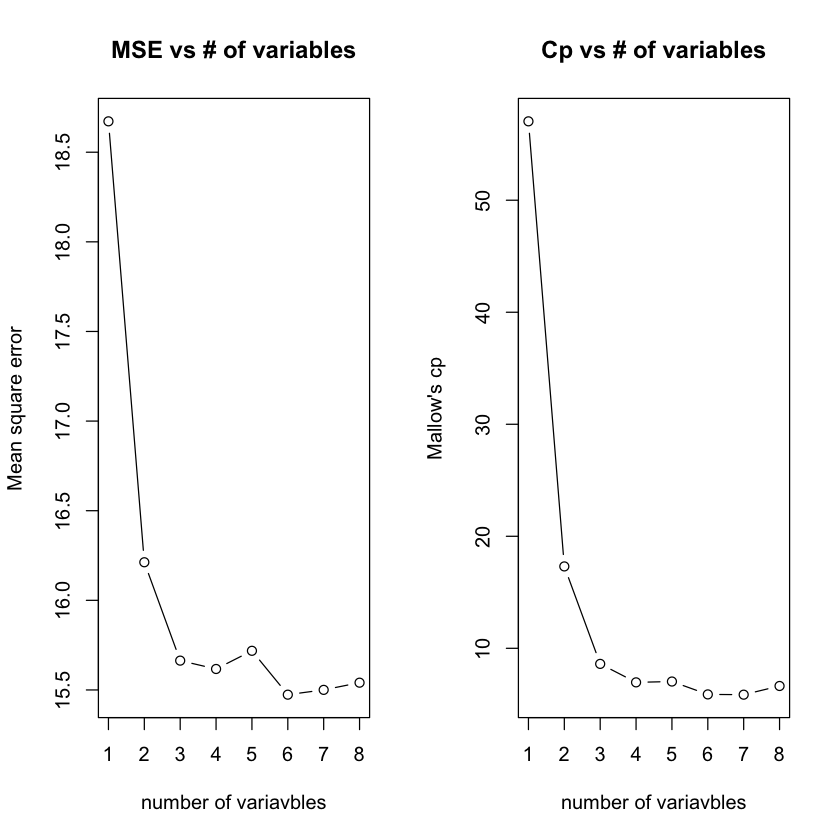

In [29]:
par(mfrow=c(1,2))
plot(x=8:1,cp_cv,xlab = "number of variavbles",ylab="Mean square error",type = "b",main = "MSE vs # of variables")
plot(x=1:8,y=g1$Cp[1:8],xlab = "number of variavbles",ylab="Mallow's cp",type = "b",main = "Cp vs # of variables")

### 4.26 Summary under the criterion of Mallow's cp

After plotting the mean square errors after cross validation and Mallow's cp whose number of variables vary from 1 to 8, we think 3 is the relatively good number of variables to estimate bodyfat. The model after the criterion of mallow's cp is BODYFAT  ~  WEIGHT + ABDOMEN + WRIST.

### 4.27 Conclusion

In [30]:
lm(BODYFAT  ~  WEIGHT + ABDOMEN + WRIST,data = cleanbodyfat)


Call:
lm(formula = BODYFAT ~ WEIGHT + ABDOMEN + WRIST, data = cleanbodyfat)

Coefficients:
(Intercept)       WEIGHT      ABDOMEN        WRIST  
  -23.58136     -0.08617      0.87932     -1.28342  


#### BODYFAT  =  -0.08617*WEIGHT + 0.87932*ABDOMEN -1.28342*WRIST -23.58136